### Mapas de Calor
Un mapa de calor (heatmap) es una representación gráfica de datos en la que se utiliza el color para indicar la magnitud de los valores en una matriz o en una tabla. Es una herramienta visual útil para detectar patrones, correlaciones y áreas de alta o baja densidad en conjuntos de datos grandes o complejos.

En un mapa de calor, cada celda de la matriz representa un valor, y el color de esa celda indica la intensidad del valor. Los colores suelen ir de un tono frío a uno cálido, por ejemplo, de azul a rojo, para representar un rango de valores numéricos.

¿Cuándo Usar un Mapa de Calor?

 - Para visualizar matrices de datos: Ideal para representar tablas de datos en forma gráfica.
 - Para analizar correlaciones: Se usa frecuentemente en análisis de datos para visualizar la correlación entre variables.
 - Para mostrar patrones: Útil para identificar patrones y anomalías en datos de gran tamaño.

¿Cuándo Evitar Mapas de Calor?

 - Datos Categóricos: No son adecuados para datos categóricos, ya que pueden inducir a error al hacer que el espectador busque patrones y ordenamientos que no existen en los datos.

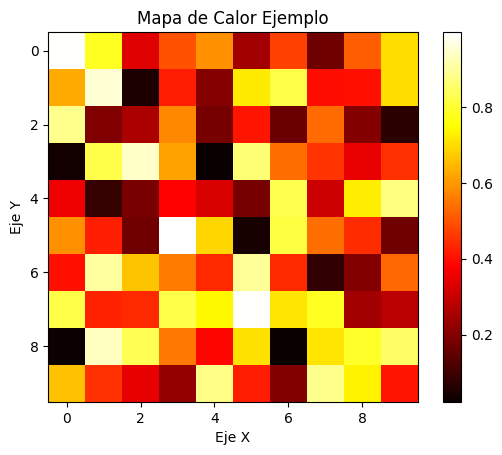

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Crear datos aleatorios para el ejemplo
data = np.random.rand(10, 10)

# Crear el mapa de calor
plt.imshow(data, cmap='hot', interpolation='nearest')

# Añadir una barra de color para mostrar la escala
plt.colorbar()

# Añadir título y etiquetas
plt.title('Mapa de Calor Ejemplo')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

# Mostrar el gráfico
plt.show()


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

# para este ejemplo cargaremos un csv con datos del tráfico de Nueva York
df=pd.read_csv("../../assets/NYC hourly traffic.csv")

# convertimos la columna date a datetime
df["Date"]=df["Date"].apply(pd.to_datetime)

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


In [4]:
# reducimos el tamaño del dataframe para que sea más accesible 
sample = df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-05-01'")
sample

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


In [ ]:
# Como tenemos 24 horas en un día, estableceremos los bins en 24, y mostramos la
# frequencia como el número de vehículos que tienen el sistema E-ZPass. Este sistema 
# factura automáticamente a los conductores por usar la carretera y ya ha sido agregado
#  (sumado) para nosotros a partir de observaciones individuales.
plt.hist(sample["Hour"], bins=24, weights=sample["# Vehicles - E-ZPass"])

/var/folders/bw/_pgpsw6n67z55_fnwxmypghr0000gn/T/ipykernel_23284/3076164835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Day of Week"] = sample["Date"].dt.dayofweek


(array([300114., 301381., 328319., 319577., 327492., 250918., 223007.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

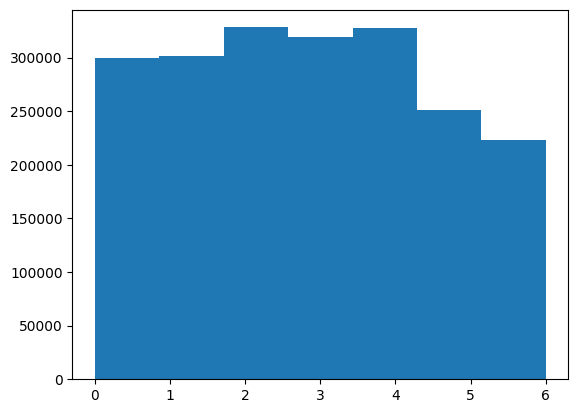

In [5]:
# podemos extraer el día de la semana de la columna Date usando las
# características de fecha y hora de pandas, para visualizar el trafico por día
sample["Day of Week"] = sample["Date"].dt.dayofweek

# una vez que hemos hecho eso, podemos simplemente observar un histograma
plt.hist(sample["Day of Week"], bins=7, weights=sample["# Vehicles - E-ZPass"])

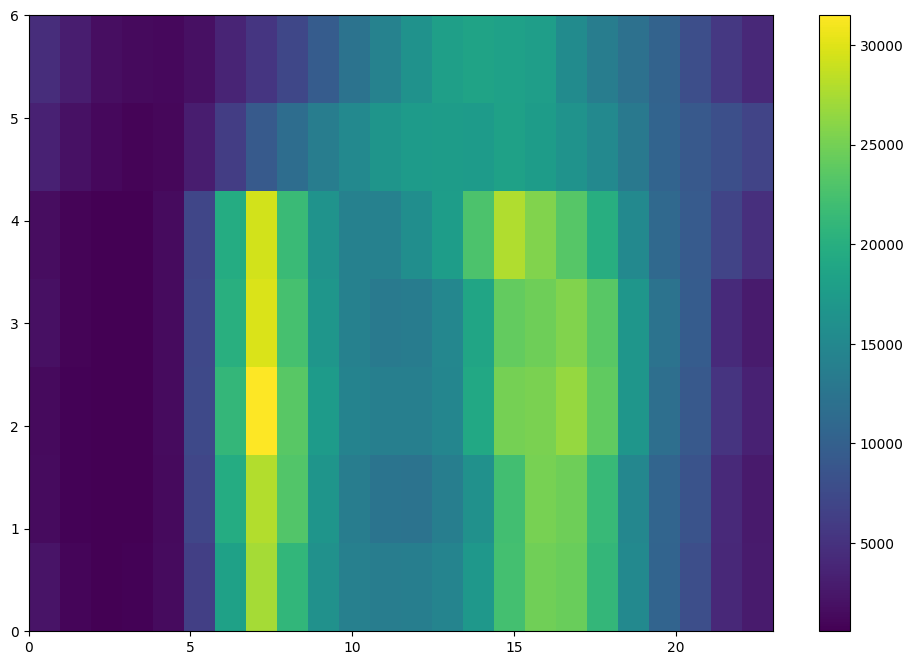

In [6]:
# la API se ve casi igual que un histograma regular, pero en este
# caso, debemos especificar el tamaño de los bins para cada eje.
plt.figure(figsize=(12,8)) # hacer una figura un poco más grande
plt.hist2d(sample["Hour"],
           sample["Day of Week"],
           bins=[24,7],
           weights=sample["# Vehicles - E-ZPass"])

# añade una leyenda que indica el valor de cada bin (celda) en el histograma
plt.colorbar()